In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("loan-prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

There are 614 rows and 13 columns

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

These are the data types of the variables. 
'Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
Property_Area         object
Loan_Status           object'
These are the categorical values other are numerical values

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values in Gender,Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History

In [6]:
columns=['Loan_Amount_Term','Dependents','Credit_History','Gender','Married','Self_Employed']         

In [7]:
for col in columns:
    df[col].fillna(df[col].mode()[0],inplace=True)


In [8]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All the null values removed

In [11]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
for i in df.columns:
    print(df[i].value_counts())
    print("******************")

LP001504    1
LP002224    1
LP001489    1
LP002697    1
LP001005    1
           ..
LP001024    1
LP002319    1
LP001657    1
LP001974    1
LP001050    1
Name: Loan_ID, Length: 614, dtype: int64
******************
Male      502
Female    112
Name: Gender, dtype: int64
******************
Yes    401
No     213
Name: Married, dtype: int64
******************
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
******************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
******************
No     532
Yes     82
Name: Self_Employed, dtype: int64
******************
2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64
******************
0.0       273
2500.0      5
2083.0      5
1666.0      5
1625.0      3
         ... 
2365.0      1
1695.0      1
2466.0      1
2375.0      1
1700.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64
******

These are the value counts of each varibales

In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


These are the statistical values of the data

# EDA

Univariate Analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

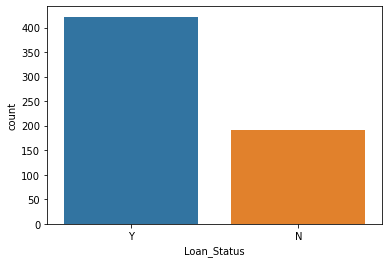

In [14]:
sn.countplot(df["Loan_Status"])

There is imbalance issue exist.

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
for column in df.columns:
    df[column]=le.fit_transform(df[column])


Converted all the strings to numerical

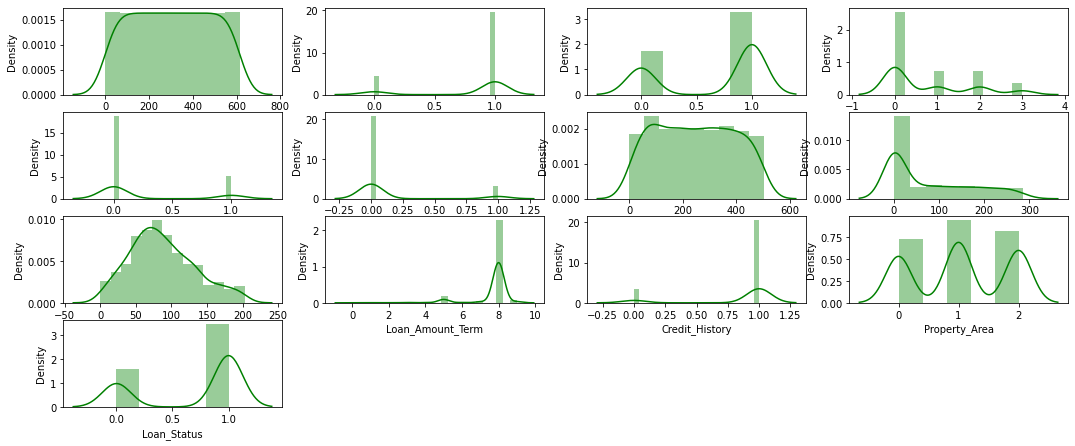

In [17]:
plt.figure(figsize=(18,15))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sn.distplot(df[i[1]],color='g')

From this we can see that only 3 columns are normaly distributed other columns are left or right skewed

# Bivariate Analysis

In [18]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:title={'center':'comparison between Self_Employed and Loan_Status'}, xlabel='Self_Employed', ylabel='Loan_Status'>

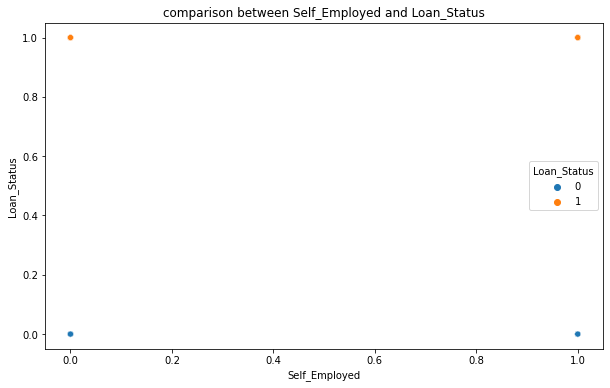

In [19]:
plt.figure(figsize=[10,6])
plt.title("comparison between Self_Employed and Loan_Status")
sn.scatterplot(df['Self_Employed'],df['Loan_Status'],hue=df["Loan_Status"])

This shows the distribution of self employed against loan status

<AxesSubplot:title={'center':'comparison between ApplicantIncome and Loan_Status'}, xlabel='ApplicantIncome', ylabel='Loan_Status'>

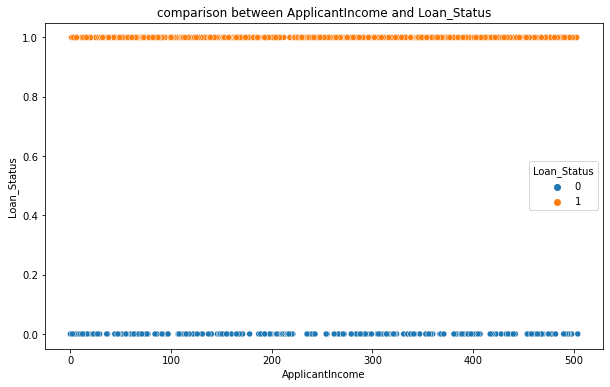

In [20]:
plt.figure(figsize=[10,6])
plt.title("comparison between ApplicantIncome and Loan_Status")
sn.scatterplot(df['ApplicantIncome'],df['Loan_Status'],hue=df["Loan_Status"])

This shows the distribution of applicant income against loan status

<AxesSubplot:title={'center':'comparison between CoapplicantIncome and Loan_Status'}, xlabel='CoapplicantIncome', ylabel='Loan_Status'>

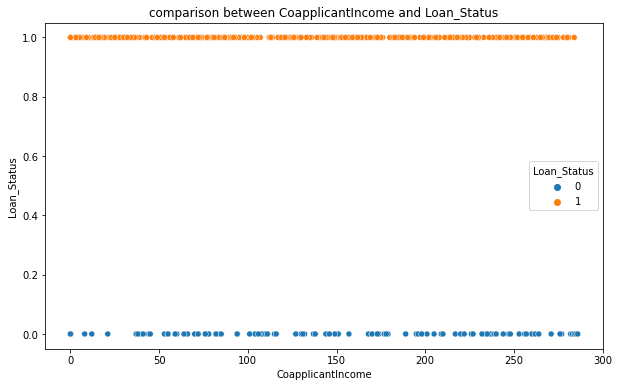

In [21]:
plt.figure(figsize=[10,6])
plt.title("comparison between CoapplicantIncome and Loan_Status")
sn.scatterplot(df['CoapplicantIncome'],df['Loan_Status'],hue=df["Loan_Status"])

This shows the distribution of co-applicantincome against loan status

<AxesSubplot:title={'center':'comparison between LoanAmount and Loan_Status'}, xlabel='LoanAmount', ylabel='Loan_Status'>

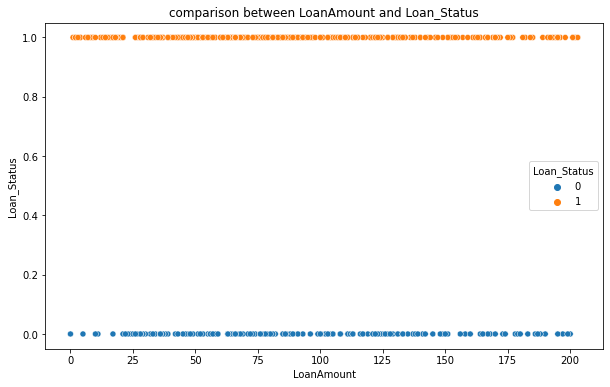

In [22]:
plt.figure(figsize=[10,6])
plt.title("comparison between LoanAmount and Loan_Status")
sn.scatterplot(df['LoanAmount'],df['Loan_Status'],hue=df["Loan_Status"])

This shows the distribution of loanamount against loan status

<AxesSubplot:title={'center':'comparison between Loan_Amount_Term and Loan_Status'}, xlabel='Loan_Amount_Term', ylabel='Loan_Status'>

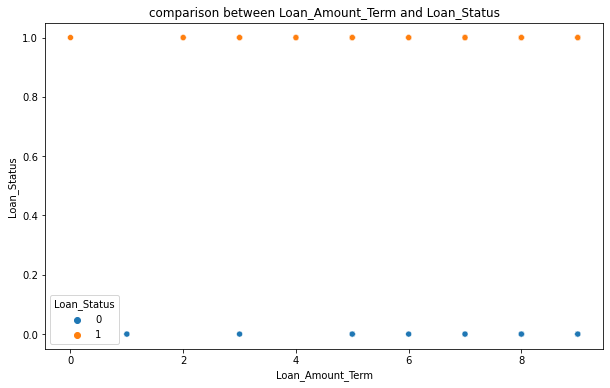

In [23]:
plt.figure(figsize=[10,6])
plt.title("comparison between Loan_Amount_Term and Loan_Status")
sn.scatterplot(df['Loan_Amount_Term'],df['Loan_Status'],hue=df["Loan_Status"])

This shows the distribution of loan amount term against loan status

<AxesSubplot:title={'center':'comparison between Credit_History and Loan_Status'}, xlabel='Credit_History', ylabel='Loan_Status'>

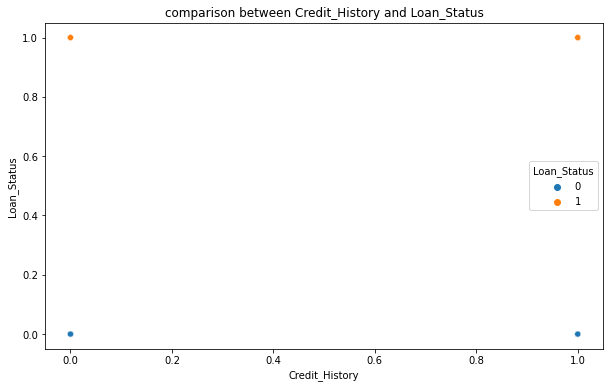

In [24]:
plt.figure(figsize=[10,6])
plt.title("comparison between Credit_History and Loan_Status")
sn.scatterplot(df['Credit_History'],df['Loan_Status'],hue=df["Loan_Status"])

This shows the distribution of credit history against loan status

<AxesSubplot:title={'center':'comparison between Property_Area and Loan_Status'}, xlabel='Property_Area', ylabel='Loan_Status'>

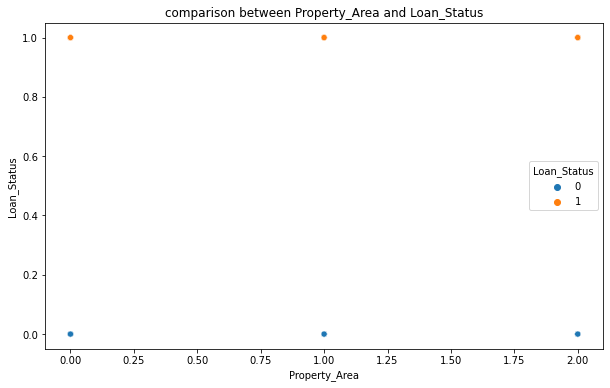

In [25]:
plt.figure(figsize=[10,6])
plt.title("comparison between Property_Area and Loan_Status")
sn.scatterplot(df['Property_Area'],df['Loan_Status'],hue=df["Loan_Status"])

This shows the distribution of property area against loan status

In [26]:
cor=df.corr()
cor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.008771,-0.030368,0.033688,-0.036504,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.074223,0.180774,0.151163,-0.065494,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.010497,0.207905,0.184857,-0.082642,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.137382,-0.065140,0.161153,-0.096377,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.190873,-0.052724,-0.172249,-0.076414,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.199142,-0.036033,0.117717,-0.029184,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.008771,0.074223,0.010497,0.137382,-0.190873,0.199142,1.000000,-0.248763,0.525324,-0.017972,0.037980,-0.065143,-0.003123
CoapplicantIncome,-0.030368,0.180774,0.207905,-0.065140,-0.052724,-0.036033,-0.248763,1.000000,0.264136,-0.015633,-0.006363,-0.082223,0.007812
LoanAmount,0.033688,0.151163,0.184857,0.161153,-0.172249,0.117717,0.525324,0.264136,1.000000,0.059344,-0.000601,-0.084076,-0.049717
Loan_Amount_Term,-0.036504,-0.065494,-0.082642,-0.096377,-0.076414,-0.029184,-0.017972,-0.015633,0.059344,1.000000,-0.002379,-0.086578,-0.005679


<AxesSubplot:>

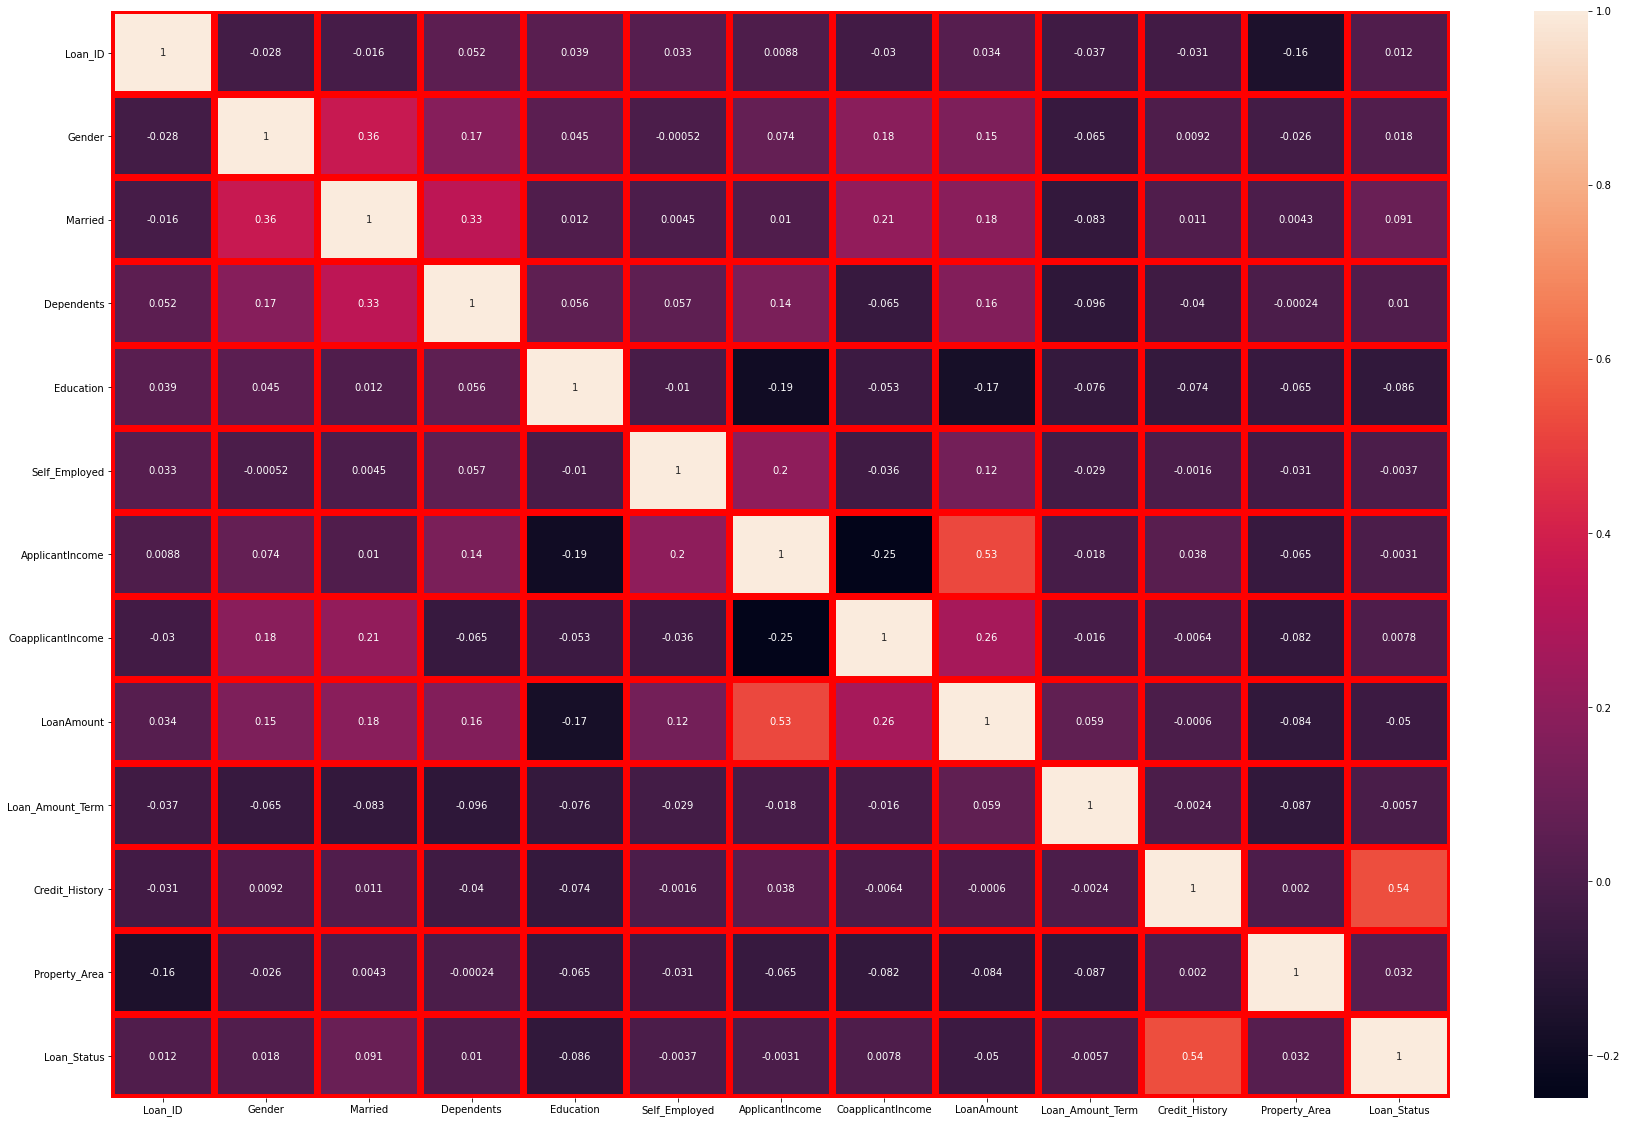

In [27]:
plt.figure(figsize=[30,20])
sn.heatmap(cor,annot=True,linewidths=6,linecolor='r')

Here not more variables are highly negatively correlated with loan status

Loan_ID                 AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Gender               AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Married              AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Dependents           AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Education            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Self_Employed        AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
ApplicantIncome      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
CoapplicantIncome          AxesSubplot(0.125,0.125;0.0945122x0.343182)
LoanAmount              AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Loan_Amount_Term        AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Credit_History          AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Property_Area           AxesSubplot(0.578659,0.125;0.0945122x0.343182)
Loan_Status             AxesSubplot(0.692073,0.125;0.0945122x0.343182)
dtype: object

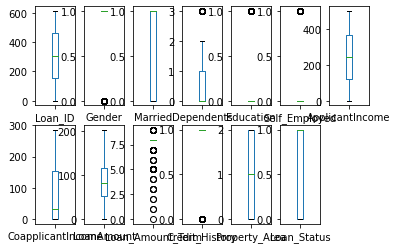

In [28]:
df.plot(kind="box",subplots=True,layout=(2,7))

There are ouliers present in the columns. Its more in loan amount term

# Outlier Remover

In [29]:
from scipy.stats import zscore

In [30]:
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [31]:
new_df.skew()

Loan_ID             -0.000263
Gender              -1.646147
Married             -0.643625
Dependents           1.027516
Education            1.372199
Self_Employed        2.189792
ApplicantIncome      0.037182
CoapplicantIncome    0.772613
LoanAmount           0.471894
Loan_Amount_Term    -2.771730
Credit_History      -1.989282
Property_Area       -0.058757
Loan_Status         -0.803760
dtype: float64

There are skewness present in 'Gender','Married','Dependents','Education','Self_Employed','CoapplicantIncome','Loan_Amount_Term','Credit_History'
not considering the skewness in the target  .  We will consider all skewness more than =/- 0.5

In [32]:
new_df.shape

(602, 13)

There were 614 columns by using zscore there are only 602 rows

In [33]:
from sklearn.preprocessing import power_transform

In [34]:
new_df[['Gender','Married','Dependents','Education','Self_Employed','CoapplicantIncome','Loan_Amount_Term','Credit_History']]=power_transform(new_df[['Gender','Married','Dependents','Education','Self_Employed','CoapplicantIncome','Loan_Amount_Term','Credit_History']])




In [35]:
new_df.skew()

Loan_ID             -0.000263
Gender              -1.646147
Married             -0.643625
Dependents           0.452468
Education            1.372199
Self_Employed        2.189792
ApplicantIncome      0.037182
CoapplicantIncome   -0.047448
LoanAmount           0.471894
Loan_Amount_Term     0.488385
Credit_History      -1.989282
Property_Area       -0.058757
Loan_Status         -0.803760
dtype: float64

Reduced the skewness

# Dividing Data into x and y

In [36]:
x=df.drop(["Loan_Status"],axis=1)
y=df["Loan_Status"]

In [37]:
x.shape

(614, 12)

In [38]:
y.shape

(614,)

# Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

Done the Scaling of the x data

# Balancing

In [40]:
import sklearn
sklearn.__version__

'0.24.1'

In [41]:
import numpy
numpy.__version__

'1.20.1'

In [42]:
dfx=df.drop(['Loan_Status'],axis=1)
dfy=df['Loan_Status']

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(dfx,dfy)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

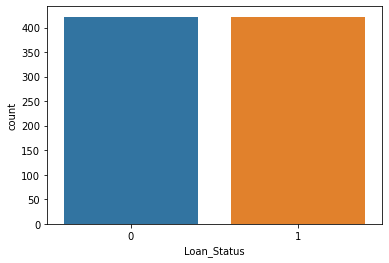

In [45]:
sn.countplot(trainy)

Balanced the target column

# Splitting the Data for Training and Testing

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Find the best random states use here

In [47]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.27,random_state=42)

In [48]:
x_train.shape

(616, 12)

In [49]:
x_test.shape

(228, 12)

In [50]:
y_train.shape

(616,)

In [51]:
y_test.shape

(228,)

In [52]:
trainy.value_counts()

0    422
1    422
Name: Loan_Status, dtype: int64

# Model building

# LogisticRegression

In [53]:
LR=LogisticRegression()

In [54]:
LR.fit(x_train,y_train)
LR_predicted=LR.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",LR.score(x_train,y_train))
print("Test accuracy::",LR.score(x_test,y_test))

0.7631578947368421
[[81 42]
 [12 93]]
              precision    recall  f1-score   support

           0       0.87      0.66      0.75       123
           1       0.69      0.89      0.78       105

    accuracy                           0.76       228
   macro avg       0.78      0.77      0.76       228
weighted avg       0.79      0.76      0.76       228

Training accuracy:: 0.7840909090909091
Test accuracy:: 0.7631578947368421


Got the accuracy as 71%

# DecisionTreeClassifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [56]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7807017543859649
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       123
           1       0.75      0.79      0.77       105

    accuracy                           0.78       228
   macro avg       0.78      0.78      0.78       228
weighted avg       0.78      0.78      0.78       228



Got the accuracy as 76%

# KNeighborsClassifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(classification_report(y_test,predknn))

0.6491228070175439
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       123
           1       0.64      0.53      0.58       105

    accuracy                           0.65       228
   macro avg       0.65      0.64      0.64       228
weighted avg       0.65      0.65      0.64       228



Got the accuracy as 65%

# RandomForestClassifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [59]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8289473684210527
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       123
           1       0.77      0.90      0.83       105

    accuracy                           0.83       228
   macro avg       0.83      0.83      0.83       228
weighted avg       0.84      0.83      0.83       228



Got the accuracy as 80%

# SVC

In [60]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')#It is a type of kernel we have aligned. Rbf is radial basis function.
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.5131578947368421
              precision    recall  f1-score   support

           0       0.57      0.38      0.46       123
           1       0.48      0.67      0.56       105

    accuracy                           0.51       228
   macro avg       0.53      0.52      0.51       228
weighted avg       0.53      0.51      0.50       228



Got the accuracy as 50%

# Cross validation

In [75]:
print(cross_val_score(dtc,x,y,cv=5).mean())

0.6921498067439691


In [76]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.809462881514061


In [77]:
print(cross_val_score(rfc,x,y,cv=5).mean())

0.7686925229908037


In [78]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.7834066373450619


# ENSEMBLE TECHNIQUES

# ADA BOOST CLASSIFIER

In [65]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
adb=AdaBoostClassifier()

In [67]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.7719298245614035
[[83 40]
 [12 93]]
              precision    recall  f1-score   support

           0       0.87      0.67      0.76       123
           1       0.70      0.89      0.78       105

    accuracy                           0.77       228
   macro avg       0.79      0.78      0.77       228
weighted avg       0.79      0.77      0.77       228

Training accuracy:: 0.8409090909090909
Test accuracy:: 0.7719298245614035


accuracy got it as 78%

# BAGGING CLASSIFIER

In [68]:
bgc=BaggingClassifier()

In [69]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.8114035087719298
[[100  23]
 [ 20  85]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       123
           1       0.79      0.81      0.80       105

    accuracy                           0.81       228
   macro avg       0.81      0.81      0.81       228
weighted avg       0.81      0.81      0.81       228

Training accuracy:: 0.9902597402597403
Test accuracy:: 0.8114035087719298


accuracy got it as 81%

# Gradient Boosting classifier

In [70]:
grbc=GradientBoostingClassifier()

In [71]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.7982456140350878
[[86 37]
 [ 9 96]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       123
           1       0.72      0.91      0.81       105

    accuracy                           0.80       228
   macro avg       0.81      0.81      0.80       228
weighted avg       0.82      0.80      0.80       228

Training accuracy:: 0.9253246753246753
Test accuracy:: 0.7982456140350878


accuracy got it as 79%

# cross validation score

In [79]:
print(cross_val_score(adb,x,y,cv=5).mean())

0.6923230707716914


In [80]:
print(cross_val_score(bgc,x,y,cv=5).mean())

0.7003731840597094


In [81]:
print(cross_val_score(grbc,x,y,cv=5).mean())

0.7133813141410104


# Hyper parameter tunning

In [85]:
grbc=GradientBoostingClassifier()
parameter={'criterion' : ['mse', 'mae'],
            'n_estimators':[100,200,50],
            'learning_rate':[0.1,0.5],
             'loss':['deviance', 'exponential']              
            }

In [86]:
from sklearn.model_selection import GridSearchCV
import numpy as np
GCV=GridSearchCV(GradientBoostingClassifier(),parameter,cv=5)

In [87]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['mse', 'mae'],
                         'learning_rate': [0.1, 0.5],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 200, 50]})

In [88]:
GCV.best_params_

{'criterion': 'mse',
 'learning_rate': 0.5,
 'loss': 'exponential',
 'n_estimators': 200}

These are the best parameters

In [89]:
final_model=GradientBoostingClassifier(criterion='mse',learning_rate=0.5,n_estimators=200,loss='exponential')
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print (accuracy*100)

79.82456140350878


Accuracy got it as 80%

# Ploltting AOC RUC CURVE

In [90]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [97]:
besr_grbc_pred=GCV.best_estimator_.predict(x_test)

In [98]:
fpr,tpr,thresh1=roc_curve(y_test,best_grbc_pred,pos_label=1)

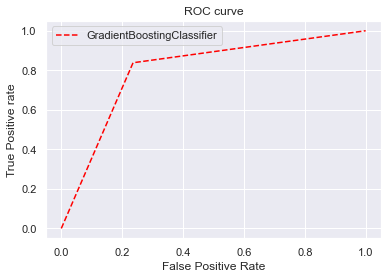

In [100]:
sn.set_theme(style="darkgrid")
plt.plot(fpr, tpr, linestyle='--',color='red', label='GradientBoostingClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

Got the ROC curve

# Saving the model

In [101]:
import joblib
joblib.dump(final_model,"Final Model of Loan application status prediction.pkl")

['Final Model of Loan application status prediction.pkl']

Saved the model